In [239]:
# импорт необходимых библеотек
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import getpass
import psycopg2
import os
import pickle
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

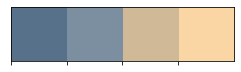

In [116]:
# задание палитры цветов
colors = ['#567189', '#7B8FA1', '#CFB997', '#FAD6A5']
sns.palplot(sns.color_palette(colors))

In [117]:
import matplotlib.colors as mcolors


def make_colormap(seq):
    
    """ функция создания пользовательского
            масштабируемого цвета """
    
    seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return mcolors.LinearSegmentedColormap('CustomMap', cdict)

In [118]:
# задание палитры цветов
c = mcolors.ColorConverter().to_rgb
rvb = make_colormap(
    [c('slategray') , 0.25, c('slategray'), c('darkgray'), 0.50, \
     c('darkgray'), c('tan'), 0.75, c('tan'), c('wheat')])

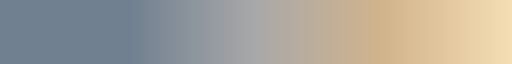

In [119]:
rvb

In [127]:
# загрузка данных
df_sentiments = pd.read_csv('data/sentiments.csv')
df_sentiments.head()

,data_name,label_name,rating,review
0,train,pos,8,"I do try not to take IMDb ratings to heart, bu..."
1,train,pos,8,"I saw this when it first came to video, my lit..."
2,train,pos,10,its great i loved it ha cause i love dinosaurs...
3,train,pos,7,"I wouldn't call ""We're Back! A Dinosaur's Stor..."
4,train,pos,10,this was a personal favorite of mine when i wa...


In [128]:
# кодирование меток данных
label = {'pos' : 1, 'neg' : 0}

In [129]:
# преобразование 
df_sentiments['label_name'] = df_sentiments['label_name'].map(label)

In [130]:
df_sentiments['review_lower'] = df_sentiments['review'].apply(lambda x: x.lower())

In [131]:
# данные для обучения
df_train = df_sentiments.query("data_name == 'train'")
df_train.head()

,data_name,label_name,rating,review,review_lower
0,train,1,8,"I do try not to take IMDb ratings to heart, bu...","i do try not to take imdb ratings to heart, bu..."
1,train,1,8,"I saw this when it first came to video, my lit...","i saw this when it first came to video, my lit..."
2,train,1,10,its great i loved it ha cause i love dinosaurs...,its great i loved it ha cause i love dinosaurs...
3,train,1,7,"I wouldn't call ""We're Back! A Dinosaur's Stor...","i wouldn't call ""we're back! a dinosaur's stor..."
4,train,1,10,this was a personal favorite of mine when i wa...,this was a personal favorite of mine when i wa...


In [132]:
# данные для теста
df_test = df_sentiments.query("data_name == 'test'")
df_test.head()

,data_name,label_name,rating,review,review_lower
24708,test,1,8,"In this peculiar movie, the themes of the end ...","in this peculiar movie, the themes of the end ..."
24709,test,1,10,"In The Book of Life, Martin Donovan plays Jesu...","in the book of life, martin donovan plays jesu..."
24710,test,1,10,I saw this movie last night on HBO & didn't ex...,i saw this movie last night on hbo & didn't ex...
24711,test,1,10,"No blood, no sex (though it oozes passion), no...","no blood, no sex (though it oozes passion), no..."
24712,test,1,10,"In The Book of Life, Martin Donovan plays Jesu...","in the book of life, martin donovan plays jesu..."


In [135]:
X_train = df_train['review_lower']
X_train[:2]

0    i do try not to take imdb ratings to heart, bu...
1    i saw this when it first came to video, my lit...
Name: review_lower, dtype: object

In [136]:
y_train = df_train[['label_name', 'rating']]
y_train[:2]

,label_name,rating
0,1,8
1,1,8


In [137]:
X_test = df_test['review_lower']
X_test[:2]

24708    in this peculiar movie, the themes of the end ...
24709    in the book of life, martin donovan plays jesu...
Name: review_lower, dtype: object

In [138]:
y_test = df_test[['label_name', 'rating']]
y_test[:2]

,label_name,rating
24708,1,8
24709,1,10


In [139]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [140]:
from sklearn.model_selection import cross_val_score

In [141]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [142]:
from sklearn.naive_bayes import MultinomialNB

In [180]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=1000)

In [200]:
# сохранение обученного TfidfVectorizer в файл
dest = os.path.join('data', 'pkl_object')
if not os.path.exists(dest):
    os.makedirs(dest)
pickle.dump(vectorizer,
            open(os.path.join(dest, 'vectorizer.pkl'), 'wb'),
            protocol=4)

In [181]:
X_train_vector = vectorizer.fit_transform(X_train)

In [182]:
X_test_vector = vectorizer.transform(X_test)

In [183]:
clf = MultinomialNB()

In [184]:
cv = cross_val_score(clf, X_train_vector, y_train['label_name'], cv=3, scoring='accuracy')

In [185]:
cv

array([0.81545476, 0.81279251, 0.81771271])

In [186]:
from sklearn.linear_model import LogisticRegression

In [187]:
logit = LogisticRegression(random_state=0)

In [188]:
cv = cross_val_score(logit, X_train_vector, y_train['label_name'], cv=3, scoring='accuracy')

In [189]:
cv

array([0.84653228, 0.83883355, 0.85083403])

In [190]:
logit = LogisticRegression(random_state=0)

In [191]:
logit.fit(X_train_vector, y_train['label_name'])

LogisticRegression(random_state=0)

In [192]:
y_pred = logit.predict(X_test_vector)

In [193]:
print(classification_report(y_test['label_name'], y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85     12500
           1       0.85      0.87      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



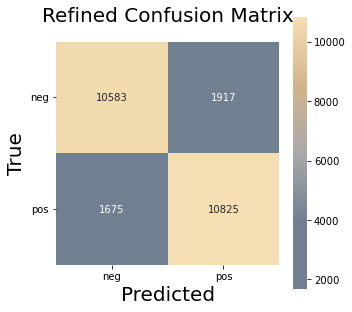

In [194]:
plt.figure(figsize=(5,5)) 
_ = sns.heatmap(confusion_matrix(y_test['label_name'], y_pred), xticklabels=['neg', 'pos'], \
                yticklabels=['neg', 'pos'], cmap=rvb, fmt='g', square=True, annot=True)
plt.title('Refined Confusion Matrix', fontsize=20, pad=20)
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('True', fontsize=20)
plt.yticks(rotation=0)
plt.show()

In [201]:
# сохранение обученной модели в файл
pickle.dump(logit,
            open(os.path.join(dest, 'logit.pkl'), 'wb'),
            protocol=4)

## Предсказание вида для нового комментария (отзыва)

In [204]:
# безопасно запрашиваем ввод пароля в CLI
password = getpass.getpass(prompt="Введите секретный пароль:")

Введите секретный пароль:········


In [216]:
# создание подключения к базе данны
connect = psycopg2.connect(database='sentiment',
                           user='postgres',
                           password=password,
                           host='127.0.0.1',
                           port='5432')

In [217]:
# создание объекта курсора подключения к базе данных
cursor = connect.cursor()

In [219]:
# выгрузка данных
cursor.execute("""SELECT label_name, review \
                  FROM sentiment
                  INNER JOIN label ON label.id = sentiment.label_id
                  INNER JOIN data ON data.id = sentiment.data_id
                  WHERE label_name = 'unsup';""")
sentiments = cursor.fetchall()
# преобразование в DataFrame
df_new_sentiments = pd.DataFrame(sentiments, columns=[_.name for _ in cursor.description])
df_new_sentiments.head()

,label_name,review
0,unsup,a well done thriller with good acting and a gr...
1,unsup,"Only one redeeming feature in this, the slowes..."
2,unsup,"Good Swedish comedy, which makes fun of Americ..."
3,unsup,The Road Home is a delightful coming of age fi...
4,unsup,"This film has a lot of heart in it, with excel..."


In [236]:
# случайный (новый) договор
review = df_new_sentiments['review'].sample(1).values[0]
review[:200]

'OK the much awaited movie. Aamir after RDB and Kajol after a long break. The movie starts off with some brilliant locales and Kajol going to Delhi for a dance program where she encounters Rehan (Aamir'

In [224]:
def review_lower(review):
    
    return pd.Series(review.lower())

In [225]:
review = review_lower(review)
review[:200]

0    yes, this remake is funnier than the original,...
dtype: object

In [226]:
# применение векторайзера
review_test = vectorizer.transform(review)

In [227]:
# получение предсказаного номера класса
class_number = logit.predict(review_test)[0]
class_number

0

In [229]:
label_revers =  {v:k for k, v in label.items()}
label_revers

{1: 'pos', 0: 'neg'}

In [230]:
label_revers[class_number]

'neg'

In [232]:
logit.predict_proba(review_test).max()

0.8436859519033797

In [242]:
from pony.orm import *
from models import db

In [245]:
db.Sentiment_New.select().show()

sentiment_id|date      |review                                      |rating_pred
------------+----------+--------------------------------------------+-----------
1           |2023-03-23|I think the difference between good and b...|None       
